In [1]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv('../data/iris.csv')

# Step 3: Preview the dataset
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# Drop the 'Id' column
df.drop('Id', axis=1, inplace=True)

# Check for null values
print("Missing values:\n", df.isnull().sum())

# Check data types
print("\nData types:\n", df.dtypes)

# Class distribution (how many of each flower type)
print("\nClass distribution:\n", df['Species'].value_counts())


Missing values:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Data types:
 SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Class distribution:
 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode target labels (Species)
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Show mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

# Separate features (X) and target (y)
X = df.drop('Species', axis=1)
y = df['Species']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Final shape check
print("X_scaled shape:", X_scaled.shape)
print("y shape:", y.shape)


Label Mapping: {'Iris-setosa': np.int64(0), 'Iris-versicolor': np.int64(1), 'Iris-virginica': np.int64(2)}
X_scaled shape: (150, 4)
y shape: (150,)


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Try K values from 1 to 15
print("Accuracy for different K values:")
for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K = {k}: Accuracy = {acc * 100:.2f}%")


Accuracy for different K values:
K = 1: Accuracy = 96.67%
K = 2: Accuracy = 93.33%
K = 3: Accuracy = 93.33%
K = 4: Accuracy = 93.33%
K = 5: Accuracy = 93.33%
K = 6: Accuracy = 93.33%
K = 7: Accuracy = 96.67%
K = 8: Accuracy = 93.33%
K = 9: Accuracy = 96.67%
K = 10: Accuracy = 96.67%
K = 11: Accuracy = 96.67%
K = 12: Accuracy = 96.67%
K = 13: Accuracy = 96.67%
K = 14: Accuracy = 93.33%
K = 15: Accuracy = 93.33%


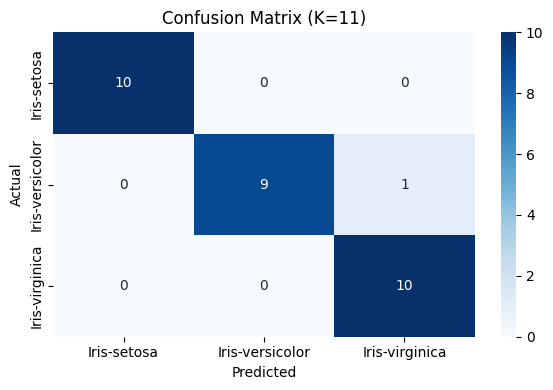

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [5]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train final KNN model with k = 11
final_knn = KNeighborsClassifier(n_neighbors=11)
final_knn.fit(X_train, y_train)
y_pred = final_knn.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (K=11)")
plt.tight_layout()
plt.savefig('../images/confusion_matrix.png')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
